<a href="https://colab.research.google.com/github/GoldK11/machineLearning/blob/main/02_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 타입 예제
**iris 데이터로 특징 행렬과 대상 배열 알아보기**

In [ ]:
import seaborn as sns

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# API 흐름
**1. 지도학습 예제: 붓꽃 분류**

In [ ]:
# 0. 데이터 준비
from sklearn.model_selection import train_test_split as tts

x_iris = iris.drop('species',axis =1)
y_iris = iris['species']

xtrain,xtest,ytrain,ytest = tts(x_iris,y_iris,random_state =1 )

In [ ]:
# 1. 모델 클래스 선택
from sklearn.naive_bayes import GaussianNB

In [ ]:
# 2. 모델 클래스 객체화 및 hyperparameter선택
model_gsnb = GaussianNB()

In [ ]:
# 3. fit()메서드로 모델 학습
model_gsnb.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# 4. predict() 메서드로 예측
y_pred = model_gsnb.predict(xtest)

In [ ]:
# 예측의 정확도 확인
from sklearn.metrics import accuracy_score as score
score(ytest,y_pred)

0.9736842105263158

**2. 비지도학습 예제: 붓꽃 차원**

In [ ]:
# 1. 모델 클래스 선택
from sklearn.decomposition import PCA

In [ ]:
# 2. 모델 클래스 객체화 및 hyperparameter선택
model_pca1 = PCA(n_components=1)
model_pca2 = PCA(n_components=2)
model_pca3 = PCA(n_components=3)

In [ ]:
# 3. fit( ) 메서드로 모델 학습
model_pca1.fit(x_iris)
model_pca2.fit(x_iris)
model_pca3.fit(x_iris)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print("n_component 1 :", model_pca1.explained_variance_ratio_)
print("n_component 2 :", model_pca2.explained_variance_ratio_)
print("n_component 3 :", model_pca3.explained_variance_ratio_)

n_component 1 : [0.92461872]
n_component 2 : [0.92461872 0.05306648]
n_component 3 : [0.92461872 0.05306648 0.01710261]


In [ ]:
a,b = model_pca2.explained_variance_ratio_ 
c,d,e = model_pca3.explained_variance_ratio_
print(a+b)
print(c+d+e)

0.977685206318795
0.9947878161267247


In [ ]:
# 4. transform( ) 메서드로 데이터 속성 변환
X_2D = model_pca2.transform(x_iris)

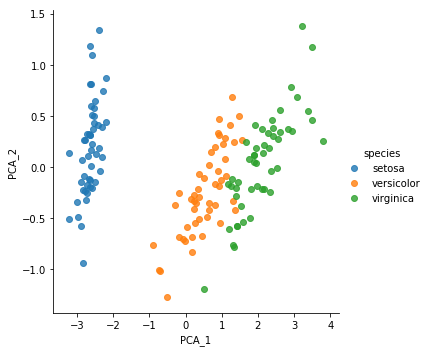

In [ ]:
# 시각화를 통한 결과 확인
iris['PCA_1'] = X_2D[:,0]
iris['PCA_2'] = X_2D[:,1]
sns.lmplot("PCA_1","PCA_2",hue = "species", data = iris, fit_reg = False)


# 데이터 세트
**데이터 세트 load_iris예제**

In [ ]:
from sklearn.datasets import load_iris

sk_iris = load_iris()

In [ ]:
import pandas as pd
iris_df = pd.DataFrame(data=sk_iris.data, columns = sk_iris.feature_names)
iris_df['label'] =sk_iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
print("iris 데이터 세트의 키값:",sk_iris.keys())

iris 데이터 세트의 키값: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


**데이터 세트 살펴보기**

In [ ]:
# 1. data

print("data의 타입: ",type(sk_iris.data))
print("data 배열의 크기: ",sk_iris.data.shape)
print(sk_iris.data[:5])  #print(sk_iris['data'])  

data의 타입:  <class 'numpy.ndarray'>
data 배열의 크기:  (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
# 2. target

print("target의 타입: ",  type(sk_iris.target))
print("target 배열의 크기: ", sk_iris.target.shape)
print(sk_iris['target'])  #print(sk_iris.target)  

target의 타입:  <class 'numpy.ndarray'>
target 배열의 크기:  (150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# 3. feature_names

print("feauture_names의 타입: ", type(sk_iris.feature_names))
print("feature_names 의 길이: ", len(sk_iris.feature_names))
print(sk_iris['feature_names']) #print(sk_iris.feaure_names)

feauture_names의 타입:  <class 'list'>
feature_names 의 길이:  4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# 4. target_names

print("target_names의 타입: ", type(sk_iris.target_names))
print("target_names 의 길이: ", len(sk_iris.target_names))
print(sk_iris['target_names']) #print(sk_iris.target_names)

target_names의 타입:  <class 'numpy.ndarray'>
target_names 의 길이:  3
['setosa' 'versicolor' 'virginica']


In [ ]:
# 5. DESCR
print(sk_iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# 6. filename
print("filename의 타입", type(sk_iris.filename))
print(sk_iris.filename)

filename의 타입 <class 'str'>
/usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/iris.csv
